In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import os
import tempfile
import time
%matplotlib inline

# Insert mavenn at beginning of path
import sys
path_to_mavenn_local = '../../../../../'
sys.path.insert(0,path_to_mavenn_local)

#Load mavenn and check path
import mavenn
print(mavenn.__path__)

# MAVE-NN utilities
from mavenn.src.dev import mavedb_to_dataset

['../../../../../mavenn']


In [2]:
# Load mave-db dataset
mavedb_file = 'urn_mavedb_00000001-a-2_scores.csv'
skiprows = 4
df = pd.read_csv(mavedb_file, skiprows=skiprows)
df.head()

,accession,hgvs_nt,hgvs_pro,score,sd,se
0,urn:mavedb:00000001-a-2#1,c.[197A>G;472T>C],p.[Asp66Gly;Ser158Pro],0.406973,0.100413,0.040993
1,urn:mavedb:00000001-a-2#2,c.[188_189delinsGG;200A>C;310_311delinsGC],p.[Leu63Arg;Asp67Ala;Arg104Ala],0.248341,0.140991,0.057559
2,urn:mavedb:00000001-a-2#3,c.[96C>G;346A>G;370_371delinsTC],p.[Ile116Val;Asn124Ser],-0.037095,0.042003,0.017148
3,urn:mavedb:00000001-a-2#4,c.[370_372delinsTCG;447A>G],p.Asn124Ser,0.277561,0.078074,0.026025
4,urn:mavedb:00000001-a-2#5,c.[408T>C;421A>G;444C>T],p.Arg141Gly,0.250270,0.073538,0.024513


In [3]:
data_df, info_dict = mavedb_to_dataset(df, 
                                       hgvs_col='hgvs_pro',
                                       y_col='score')
print(info_dict)
data_df.head()

{'wt_seq': 'MSGIALSRLAQERKAWRKDHPFGFVAVPTKNPDGTMNLMNWECAIPGKKGTPWEGGLFKLRMLFKDDYPSSPPKCKFEPPLFHPNVYPSGTVCLSILEEDKDWRPAITIKQILLGIQELLNEPNIQDPAQAEAYTIYCQNRVEYEKRVRAQAKKFAPS', 'alphabet': 'protein'}


,training_set,hamming_dist,accession,hgvs_nt,sd,se,y,x
id,,,,,,,,
0,True,2,urn:mavedb:00000001-a-2#1,c.[197A>G;472T>C],0.100413,0.040993,0.406973,MSGIALSRLAQERKAWRKDHPFGFVAVPTKNPDGTMNLMNWECAIP...
1,True,3,urn:mavedb:00000001-a-2#2,c.[188_189delinsGG;200A>C;310_311delinsGC],0.140991,0.057559,0.248341,MSGIALSRLAQERKAWRKDHPFGFVAVPTKNPDGTMNLMNWECAIP...
2,True,2,urn:mavedb:00000001-a-2#3,c.[96C>G;346A>G;370_371delinsTC],0.042003,0.017148,-0.037095,MSGIALSRLAQERKAWRKDHPFGFVAVPTKNPDGTMNLMNWECAIP...
3,True,1,urn:mavedb:00000001-a-2#4,c.[370_372delinsTCG;447A>G],0.078074,0.026025,0.277561,MSGIALSRLAQERKAWRKDHPFGFVAVPTKNPDGTMNLMNWECAIP...
4,True,1,urn:mavedb:00000001-a-2#5,c.[408T>C;421A>G;444C>T],0.073538,0.024513,0.250270,MSGIALSRLAQERKAWRKDHPFGFVAVPTKNPDGTMNLMNWECAIP...


In [4]:
# Save data_df
file_name = 'dataset.csv.gz'
data_df.to_csv(file_name, compression='gzip')
!du -mh $file_name

212K	dataset.csv.gz


In [5]:
mask_dict = mavenn.get_mask_dict(data_df['x'], alphabet='protein')
mask_dict

{0: 'ACDEFGHKNPQSVWY',
 1: 'DEGHIKQV',
 2: 'CDFHIKLMNPQSTY',
 3: 'ACDEHKPQRWY',
 4: 'CEFHIKLMNQRWY',
 5: 'ACDEGKMNQSTWY',
 6: 'AEFHKLMPQVWY',
 7: 'ACDEFHLMNPQTVWY',
 8: 'ACDEGKMNQRSTWY',
 9: 'CEFHIKLMNPQRWY',
 10: 'CDFIMNPSVWY',
 11: 'CFHILMNY',
 12: 'ACFHIVY',
 13: 'CFHMQVWY',
 14: 'FHMQRY',
 15: 'H',
 16: 'DHL',
 17: 'ADHL',
 18: 'CFHIKLMPQRSTW',
 19: 'ACEFIKMNTVW',
 20: 'CDEGHIKMNVWY',
 21: 'ADGPQW',
 22: 'FILNPQT',
 23: 'DEGHMPQRTVW',
 24: 'CDFHIKNQRSTW',
 25: 'CDFHIKLMNQWY',
 26: 'CEGKMNPQRSTWY',
 27: 'CDFGHKMRW',
 28: 'CDEGHLMQVWY',
 29: 'ACGHMPSVWY',
 30: 'AEPVW',
 31: 'CDFIKQRVW',
 32: 'CIKLMP',
 33: 'FPQWY',
 34: 'DFGHLNQ',
 35: 'CDEFHRY',
 36: 'CEFHMQV',
 37: 'ACDEMQSTY',
 38: 'ACDEFGHNPQRWY',
 39: 'ACEFGHLMQRVW',
 40: 'AEFHIMNPQSTVY',
 41: 'CFILMNPRSTY',
 42: 'ADEFGHILMNPQV',
 43: 'EHIKLMNQRWY',
 44: 'ACDEGKPQRSWY',
 45: 'CEFGHIKVW',
 46: 'ACDFHILMNQSVWY',
 47: 'ACDGHLPSVWY',
 48: 'CDFGHLMPSTVWY',
 49: 'ACDFHIKLNPTY',
 50: 'CEFGMQVWY',
 51: 'CHI',
 52: 'ADFIMNPQTVY',
 53: 'C

In [6]:
len(data_df)

3418

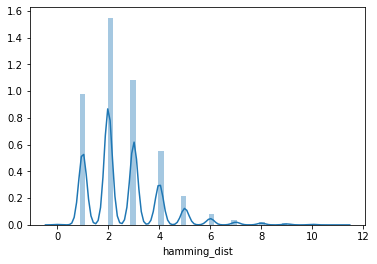

In [7]:
import seaborn as sns
sns.distplot(data_df['hamming_dist'])

In [8]:
# Split into training and test sets
ix = data_df['training_set']
training_df = data_df[ix].copy()
test_df = data_df[~ix].copy()

In [9]:
# Infer additive model
model = mavenn.Model(x=training_df['x'].values,
                     y=training_df['y'].values,
                     alphabet='protein',
                     gpmap_type='additive',
                     regression_type='GE',
                     ge_noise_model_type='Gaussian',
                     ge_heteroskedasticity_order=0)

In [10]:
start_time = time.time()
history = model.fit(epochs=1000, early_stopping=True, early_stopping_patience=50, learning_rate=.005, batch_size=50)
training_time = time.time()-start_time
print(f'training time: {training_time:.1f} seconds')

Epoch 1/1000
44/44 [==============================] - 0s 6ms/step - loss: 75.1879 - val_loss: 52.4039
Epoch 2/1000
44/44 [==============================] - 0s 2ms/step - loss: 49.9968 - val_loss: 48.0026
Epoch 3/1000
44/44 [==============================] - 0s 2ms/step - loss: 45.4707 - val_loss: 43.9431
Epoch 4/1000
44/44 [==============================] - 0s 2ms/step - loss: 41.3467 - val_loss: 40.8207
Epoch 5/1000
44/44 [==============================] - 0s 2ms/step - loss: 38.0756 - val_loss: 38.7842
Epoch 6/1000
44/44 [==============================] - 0s 2ms/step - loss: 35.9251 - val_loss: 37.2280
Epoch 7/1000
44/44 [==============================] - 0s 2ms/step - loss: 34.6600 - val_loss: 36.7948
Epoch 8/1000
44/44 [==============================] - 0s 2ms/step - loss: 34.0076 - val_loss: 36.6913
Epoch 9/1000
44/44 [==============================] - 0s 3ms/step - loss: 33.6747 - val_loss: 36.7334
Epoch 10/1000
44/44 [==============================] - 0s 4ms/step - loss: 33.6128

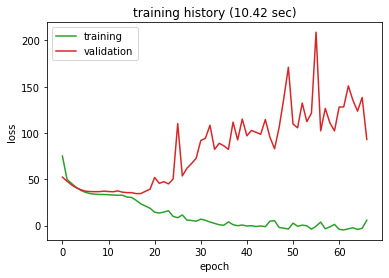

In [11]:
# Extract training loss and validation loss
history_dict = history.history
loss_training = history_dict['loss']
loss_validation = history_dict['val_loss']

# Plot model training history
fig, ax = plt.subplots()
ax.plot(loss_training, color='C2', label='training')
ax.plot(loss_validation, color='C3', label='validation')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.set_title(f"training history ({training_time:.2f} sec)")
ax.legend()

Text(0.5, 1.0, 'mutation effects')

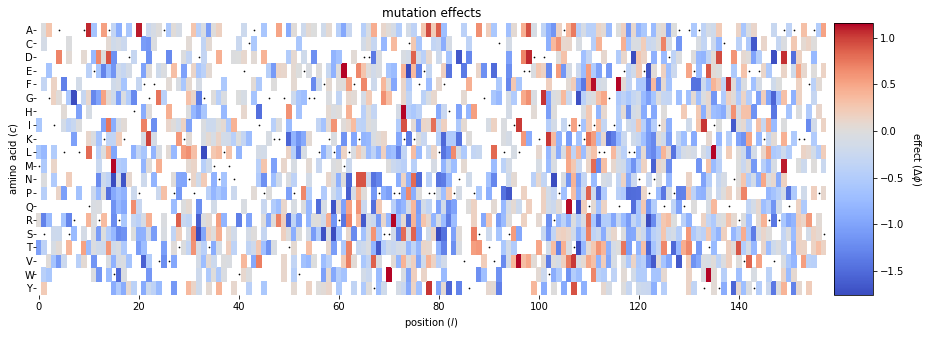

In [12]:
# Set wild-type sequence
wt_seq = info_dict['wt_seq']

# Get effects of all single-point mutations on phi
dphi_df = mavenn.get_1pt_effects(func=model.x_to_phi,
                                 wt_seq=wt_seq,
                                 alphabet='protein')
# Draw heatmap
fig, ax = plt.subplots(figsize=[15,5])
ax, cb = mavenn.heatmap(dphi_df,
                        ccenter=0,
                        clim_quantile=.99,
                        mask_dict=mask_dict,
                        #clim=[-1,.2],
                        c_col='c_mut',
                        l_col='l',
                        value_col='dphi',
                        seq=wt_seq,
                        #cmap='PiYG',
                        ax=ax)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
cb.set_label('effect ($\Delta\phi$)', rotation=-90, va="bottom")
ax.set_title('mutation effects')

In [13]:
# Extract data into np.arrays
x = test_df['x'].values
y = test_df['y'].values

# Compute phi and yhat values
phi = model.x_to_phi(x)
yhat = model.phi_to_yhat(phi)

# Create grid for plotting yhat and yqs
phi_lim = [-5, 2.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)
yhat_grid = model.phi_to_yhat(phi_grid)
yqs_grid = model.yhat_to_yq(yhat_grid, q=[.16,.84])

Text(0.5, 1.0, 'measurement process')

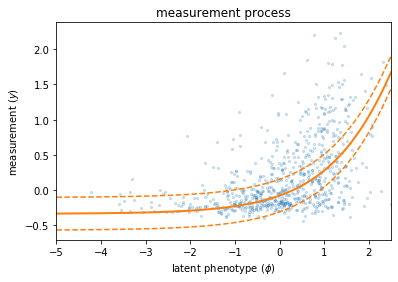

In [14]:
fig, ax = plt.subplots()

ax.scatter(phi, y, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1',
        label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')